# Phytoplankton species

In [6]:
# imports
import os
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time
import scipy.io as sio
#import random 

import pandas

from oceancolor.tara import io as tara_io

from cnmf.oceanography import iops
from cnmf import io as cnmf_io

In [2]:
%matplotlib ipympl

# Load

## NMF

In [3]:
nmf_fit = 'Tara'
N_NMF = 3
d = cnmf_io.load_nmf(nmf_fit, N_NMF, 'a')

Loading: /home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/Tara/Tara_NMF_03_a.npz


## Phyto

In [4]:
cpath = '/home/xavier/Projects/Oceanography/python/cael_chase_boss_2020_applied_optics'

In [7]:
moore_file = os.path.join(cpath, 'data_moore.mat')

In [8]:
moore_data = sio.loadmat(moore_file)

In [15]:
moore_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'spectra', 'wvl'])

In [14]:
moore_data['labels'][0][:]

array([array(['Pro SS120 9'], dtype='<U11'),
       array(['ProSS120 70'], dtype='<U11'),
       array(['Pro MED4 9'], dtype='<U10'),
       array(['Pro MED4 70'], dtype='<U11'),
       array(['SynWH8103'], dtype='<U9')], dtype=object)

In [18]:
moore_data['spectra'].shape

(301, 5)

In [19]:
moore_data['wvl'].shape

(1, 301)

In [21]:
wave = moore_data['wvl'][0,:]

# Plot

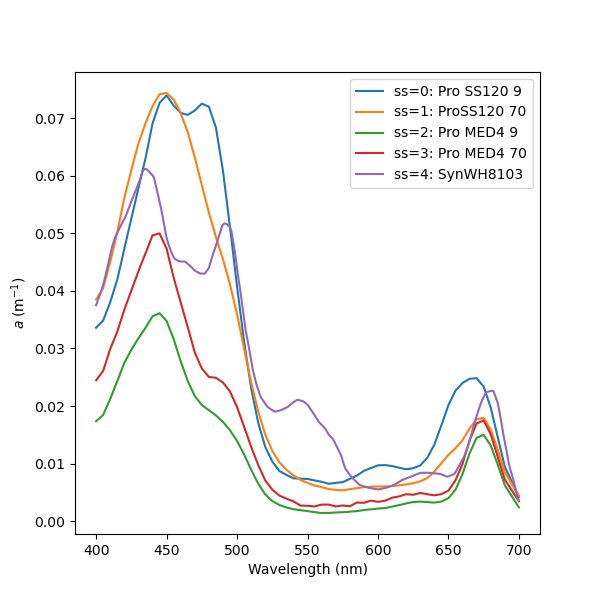

In [23]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

for ss in range(moore_data['spectra'].shape[1]):
    lbl = moore_data['labels'][0][ss][0]
    ax.plot(wave, moore_data['spectra'][:,ss], label=f'ss={ss}: {lbl}')

ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a \; ({\rm m}^{-1})$')

plt.show()